In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbl
import re

In [5]:
data = pd.read_csv('equipos-de-futbol.csv')

In [6]:
print(data.head())

                  Club     Competition   Age  Squad_size Market_value  \
0      Manchester City  Premier League  27.2          23      €1.05bn   
1  Paris Saint-Germain         Ligue 1  26.1          35     €997.75m   
2    Manchester United  Premier League  28.0          28     €937.25m   
3           Chelsea FC  Premier League  26.8          27     €882.50m   
4         Liverpool FC  Premier League  27.0          27     €879.50m   

  Market_value_of_players MV_Top_18_players Share_of_MV  
0                 €45.75m          €988.00m      93.9 %  
1                 €28.51m          €889.00m      89.1 %  
2                 €33.47m          €850.00m      90.7 %  
3                 €32.69m          €816.00m      92.5 %  
4                 €32.57m          €810.50m      92.2 %  


In [7]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Club                     100 non-null    object 
 1   Competition              100 non-null    object 
 2   Age                      100 non-null    float64
 3   Squad_size               100 non-null    int64  
 4   Market_value             100 non-null    object 
 5   Market_value_of_players  100 non-null    object 
 6   MV_Top_18_players        100 non-null    object 
 7   Share_of_MV              100 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 6.4+ KB
None


In [8]:
print(data.describe())

             Age  Squad_size
count  100.00000   100.00000
mean    26.30800    27.54000
std      1.39499     2.87244
min     23.10000    21.00000
25%     25.40000    26.00000
50%     26.25000    27.00000
75%     27.42500    29.00000
max     29.90000    35.00000


In [9]:
print(len(data))

100


In [10]:
display(data)
# Market_value = colum_value total de cada plantel 
# Market_value_of_players = 
# MV_Top_18_players = colum_value total de los 18 jugadores mas caros 
# Share_of_MV = cuanto % del total de Market_value_of_players ocupan los 18 jugadores mas caros 


,Club,Competition,Age,Squad_size,Market_value,Market_value_of_players,MV_Top_18_players,Share_of_MV
0,Manchester City,Premier League,27.2,23,€1.05bn,€45.75m,€988.00m,93.9 %
1,Paris Saint-Germain,Ligue 1,26.1,35,€997.75m,€28.51m,€889.00m,89.1 %
2,Manchester United,Premier League,28.0,28,€937.25m,€33.47m,€850.00m,90.7 %
3,Chelsea FC,Premier League,26.8,27,€882.50m,€32.69m,€816.00m,92.5 %
4,Liverpool FC,Premier League,27.0,27,€879.50m,€32.57m,€810.50m,92.2 %
...,...,...,...,...,...,...,...,...
95,Clube Atlético Mineiro,Série A,26.9,31,€98.45m,€3.18m,€84.95m,86.3 %
96,FC Augsburg,Bundesliga,26.1,28,€97.10m,€3.47m,€88.00m,90.6 %
97,Lokomotiv Moscow,Premier Liga,24.8,29,€97.03m,€3.35m,€86.50m,89.2 %
98,Trabzonspor,Süper Lig,26.7,29,€96.30m,€3.32m,€89.00m,92.4 %


### Objetivo del análisis 
Identificar y comprender los factores clave que contribuyen a la alta colum_valueación económica de los 100 clubes de fútbol más valiosos del mundo, explorando la relación entre las ligas a las que pertenecen, la edad promedio de sus planteles, la cantidad de jugadores, el colum_value total del plantel y la concentración del colum_value en sus jugadores más caros, para así desentrañar los patrones que definen a la élite económica del fútbol actual.

#### data quality test pyhton 


In [11]:
def basic_data_quality_check(data):
    """
    Pruebas básicas de calidad de datos
    """
    print("=== PRUEBAS BÁSICAS DE CALIDAD DE DATOS ===")
    
    # 1. Información general
    print(f"1. Dimensiones: {data.shape}")
    print(f"2. Tipos de datos:\n{data.dtypes}")
    
    # 3. colum_valuees faltantes
    print(f"\n3. colum_valueES FALTANTES:")
    missing_data = data.isnull().sum()
    missing_percent = (missing_data / len(data)) * 100
    missing_info = pd.DataFrame({
        'colum_valuees_Faltantes': missing_data,
        'Porcentaje': missing_percent
    })
    print(missing_info[missing_info['colum_valuees_Faltantes'] > 0])
    
    # 4. colum_valuees duplicados
    print(f"\n4. FILAS DUPLICADAS:")
    duplicates = data.duplicated().sum()
    print(f"   Total duplicados: {duplicates}")
    print(f"   Porcentaje duplicados: {(duplicates/len(data))*100:.2f}%")
    
    # 5. colum_valuees únicos por column_name
    print(f"\n5. colum_valueES ÚNICOS POR column_name:")
    for col in data.columns:
        unique_count = data[col].nunique()
        print(f"   {col}: {unique_count} colum_valuees únicos")
    
    return {
        'dimensions': data.shape,
        'missing_data': missing_info,
        'duplicates': duplicates,
        'unique_counts': {col: data[col].nunique() for col in data.columns}
    }

# Uso
data = pd.read_csv('equipos-de-futbol.csv')
display(data)
results = basic_data_quality_check(data)

,Club,Competition,Age,Squad_size,Market_value,Market_value_of_players,MV_Top_18_players,Share_of_MV
0,Manchester City,Premier League,27.2,23,€1.05bn,€45.75m,€988.00m,93.9 %
1,Paris Saint-Germain,Ligue 1,26.1,35,€997.75m,€28.51m,€889.00m,89.1 %
2,Manchester United,Premier League,28.0,28,€937.25m,€33.47m,€850.00m,90.7 %
3,Chelsea FC,Premier League,26.8,27,€882.50m,€32.69m,€816.00m,92.5 %
4,Liverpool FC,Premier League,27.0,27,€879.50m,€32.57m,€810.50m,92.2 %
...,...,...,...,...,...,...,...,...
95,Clube Atlético Mineiro,Série A,26.9,31,€98.45m,€3.18m,€84.95m,86.3 %
96,FC Augsburg,Bundesliga,26.1,28,€97.10m,€3.47m,€88.00m,90.6 %
97,Lokomotiv Moscow,Premier Liga,24.8,29,€97.03m,€3.35m,€86.50m,89.2 %
98,Trabzonspor,Süper Lig,26.7,29,€96.30m,€3.32m,€89.00m,92.4 %


=== PRUEBAS BÁSICAS DE CALIDAD DE DATOS ===
1. Dimensiones: (100, 8)
2. Tipos de datos:
Club                        object
Competition                 object
Age                        float64
Squad_size                   int64
Market_value                object
Market_value_of_players     object
MV_Top_18_players           object
Share_of_MV                 object
dtype: object

3. colum_valueES FALTANTES:
Empty DataFrame
Columns: [colum_valuees_Faltantes, Porcentaje]
Index: []

4. FILAS DUPLICADAS:
   Total duplicados: 0
   Porcentaje duplicados: 0.00%

5. colum_valueES ÚNICOS POR column_name:
   Club: 100 colum_valuees únicos
   Competition: 16 colum_valuees únicos
   Age: 46 colum_valuees únicos
   Squad_size: 15 colum_valuees únicos
   Market_value: 99 colum_valuees únicos
   Market_value_of_players: 94 colum_valuees únicos
   MV_Top_18_players: 99 colum_valuees únicos
   Share_of_MV: 65 colum_valuees únicos


In [12]:
# Market_value --> eliminar € y m , pasar bn a m 
# Market_value_of_players --> eliminar € y m , pasar bn a m 
# MV_Top_18_players --> eliminar € y m , pasar bn a m 
# Share_of_MV --> eliminar el % y pasarlo a decimal 
map_data_column_names = [ "Market_value", "Market_value_of_players", "MV_Top_18_players", "Share_of_MV" ]

# Leer datos
def convert_column_value(colum_value):
        if pd.isna(colum_value) or colum_value == '':
            return np.nan
        
        colum_value_str = str(colum_value).strip().lower()
        
        # Remover símbolos de moneda y espacios
        colum_value_str = re.sub(r'[\$€£¥bnm%, ]', '', colum_value_str)
        
        # Buscar multiplicadores (bn, %)
        multiplicador = 1
        if colum_value.endswith('bn'):
            multiplicador = 1000
            colum_value_str = float(colum_value_str) * 1000
        elif colum_value.endswith('%'):
            divisor = 100 
            colum_value_str = float(colum_value_str) / divisor

        try:
            number = float(colum_value_str)
            return number
        except ValueError:
            return np.nan
            
def clean_column_values(data, columns):
    data_converter = data.copy()
    for i in range(len(columns)):
        column_name = columns[i]
        data_converter = data_converter.drop(columns=[column_name])
        data_converter[f'{column_name}'] = data[column_name].apply(convert_column_value)
        
    
    return data_converter

# Uso
data = clean_column_values(data, map_data_column_names)
display(data)

,Club,Competition,Age,Squad_size,Market_value,Market_value_of_players,MV_Top_18_players,Share_of_MV
0,Manchester City,Premier League,27.2,23,1050.00,45.75,988.00,0.939
1,Paris Saint-Germain,Ligue 1,26.1,35,997.75,28.51,889.00,0.891
2,Manchester United,Premier League,28.0,28,937.25,33.47,850.00,0.907
3,Chelsea FC,Premier League,26.8,27,882.50,32.69,816.00,0.925
4,Liverpool FC,Premier League,27.0,27,879.50,32.57,810.50,0.922
...,...,...,...,...,...,...,...,...
95,Clube Atlético Mineiro,Série A,26.9,31,98.45,3.18,84.95,0.863
96,FC Augsburg,Bundesliga,26.1,28,97.10,3.47,88.00,0.906
97,Lokomotiv Moscow,Premier Liga,24.8,29,97.03,3.35,86.50,0.892
98,Trabzonspor,Süper Lig,26.7,29,96.30,3.32,89.00,0.924


In [13]:
display(data.head(1))

,Club,Competition,Age,Squad_size,Market_value,Market_value_of_players,MV_Top_18_players,Share_of_MV
0,Manchester City,Premier League,27.2,23,1050.0,45.75,988.0,0.939


### Medidas de tendencia central ( sobre cada column_name númerica )
#### media 
#### mediana 
#### moda

In [14]:
print(data.describe())
print(data.select_dtypes(include=["object"]).columns)
numeric_columns = data.select_dtypes(include=[np.number]).columns
print(numeric_columns)

             Age  Squad_size  Market_value  Market_value_of_players  \
count  100.00000   100.00000     100.00000               100.000000   
mean    26.30800    27.54000     292.69270                10.852200   
std      1.39499     2.87244     230.95511                 8.848602   
min     23.10000    21.00000      93.50000                 2.920000   
25%     25.40000    26.00000     126.62500                 4.695000   
50%     26.25000    27.00000     202.92500                 7.570000   
75%     27.42500    29.00000     359.18750                13.922500   
max     29.90000    35.00000    1050.00000                45.750000   

       MV_Top_18_players  Share_of_MV  
count         100.000000   100.000000  
mean          270.750800     0.924180  
std           213.423125     0.030104  
min            84.950000     0.837000  
25%           118.250000     0.905750  
50%           185.450000     0.924000  
75%           344.750000     0.950250  
max           988.000000     0.986000  


### Histogramas para datos no númerico

columns categóricas encontradas: ['Competition']


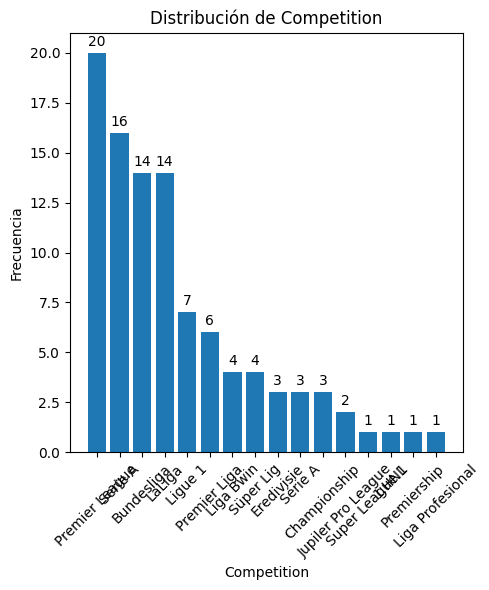

In [15]:
def histograma_categoricas_basico(data, columns_categoricas):
    """
    Crear gráficos de barras para columns categóricas
    """
    # Seleccionar columns categóricas
    # columns_categoricas = data.select_dtypes(include=['object', 'category']).columns
    
    print(f"columns categóricas encontradas: {list(columns_categoricas)}")
    
    # Crear subplots
    n_cols = len(columns_categoricas)
    fig, axes = plt.subplots(1, n_cols, figsize=(5*n_cols, 6))
    
    if n_cols == 1:
        axes = [axes]
    
    for i, column_name in enumerate(columns_categoricas):
        # Contar frecuencias
        frecuencias = data[column_name].value_counts()
        
        # Crear gráfico de barras
        axes[i].bar(range(len(frecuencias)), frecuencias.values)
        axes[i].set_title(f'Distribución de {column_name}')
        axes[i].set_xlabel(column_name)
        axes[i].set_ylabel('Frecuencia')
        axes[i].set_xticks(range(len(frecuencias)))
        axes[i].set_xticklabels(frecuencias.index, rotation=45)
        
        # Agregar colum_valuees en las barras
        for j, v in enumerate(frecuencias.values):
            axes[i].text(j, v + max(frecuencias.values)*0.01, str(v), 
                        ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

# Uso
histograma_categoricas_basico(data, ["Competition"])

### Outliers 
#### Diagrama de cajas y bigotes

/var/folders/fq/6vkst89d5550c5mvxvvytqh80000gn/T/ipykernel_79073/2904890415.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data[col].dropna() for col in columns_numericas],


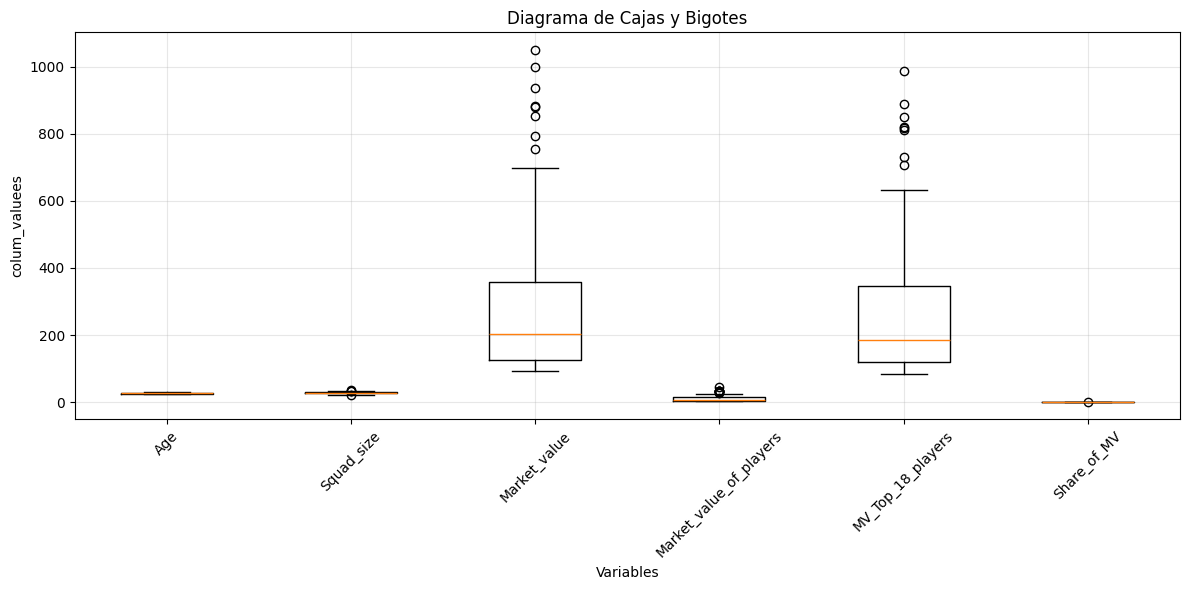

In [16]:
def boxplot_matplotlib(data):
    """
    Crear diagrama de cajas y bigotes con matplotlib
    """
    # Seleccionar columns numéricas
    columns_numericas = data.select_dtypes(include=[np.number]).columns
    
    # Crear figura
    plt.figure(figsize=(12, 6))
    
    # Crear boxplot
    plt.boxplot([data[col].dropna() for col in columns_numericas], 
                labels=columns_numericas)
    
    plt.title('Diagrama de Cajas y Bigotes')
    plt.ylabel('colum_valuees')
    plt.xlabel('Variables')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Uso
boxplot_matplotlib(data)

<Axes: >

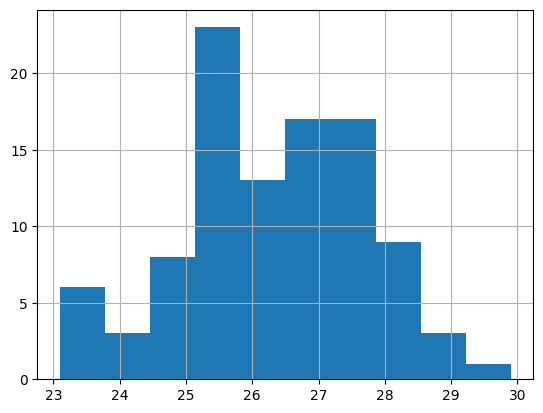

In [17]:
data["Age"].hist()

<Axes: xlabel='Age'>

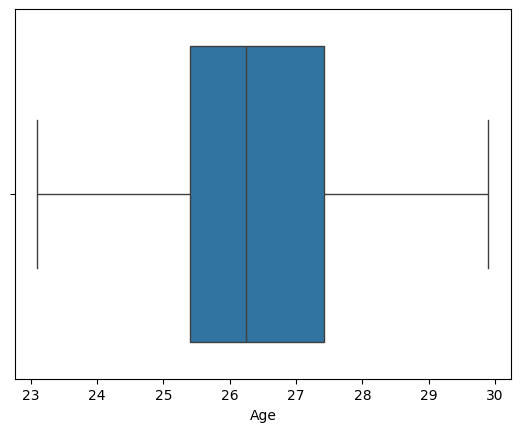

In [18]:
sbl.boxplot(x=data["Age"])

<Axes: xlabel='Squad_size'>

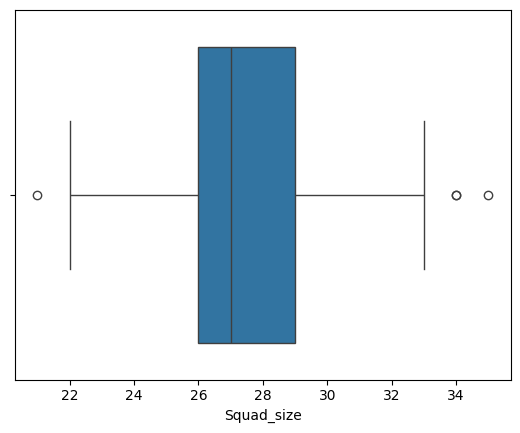

In [19]:
sbl.boxplot(x=data["Squad_size"])

<Axes: xlabel='Market_value'>

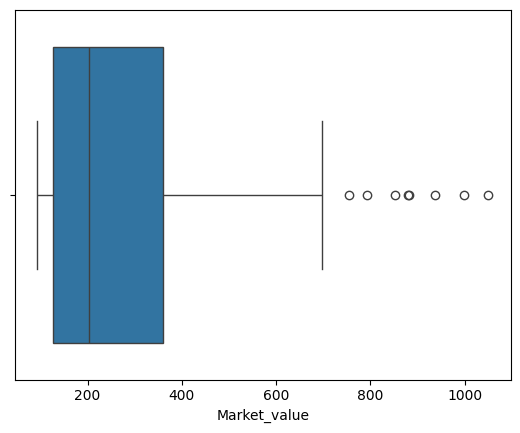

In [20]:
sbl.boxplot(x=data["Market_value"])

<Axes: xlabel='Market_value_of_players'>

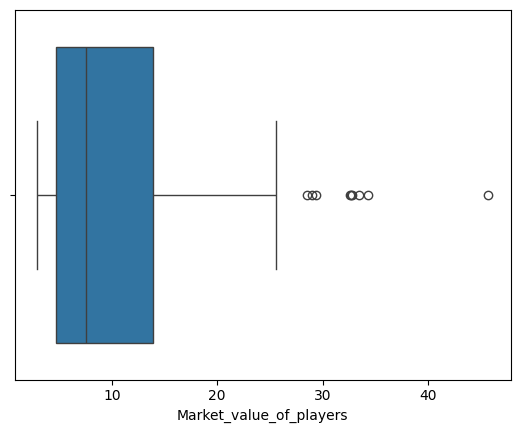

In [21]:
sbl.boxplot(x=data["Market_value_of_players"])

<Axes: xlabel='MV_Top_18_players'>

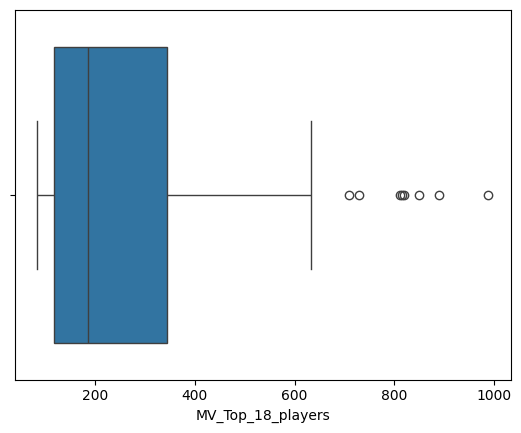

In [22]:
sbl.boxplot(x=data["MV_Top_18_players"])

<Axes: xlabel='Share_of_MV'>

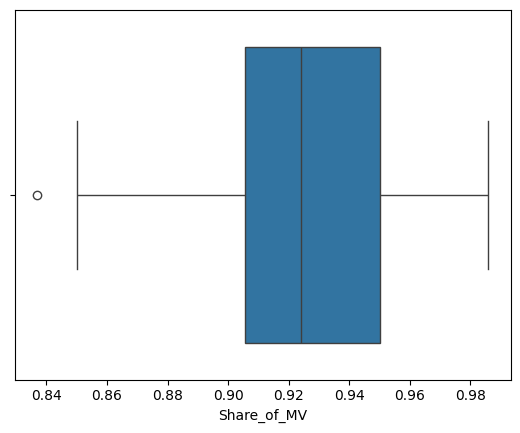

In [23]:
sbl.boxplot(x=data["Share_of_MV"])